<a href="https://colab.research.google.com/github/Asit-1121130118/practice-projects/blob/master/cotton_disease_prediction_InceptionV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Cotton Disease prediction using Transfer Learning InceptionV3***

In [1]:
# importing the libraries

import tensorflow as tf

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob #used for knowing the number of input image folder 

In [2]:
# loading the data

IMAGE_SIZE = [224,224]
train_path = '/content/drive/MyDrive/datasets/Cotton Disease/train'
test_path = '/content/drive/MyDrive/datasets/Cotton Disease/test'

In [5]:
# importing the inception_v3 library
# using pre-defined imagenet weights and adding input layer

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
# in input_shape, +[3] is for adding the third dimension to the image shape as it is for RGB channel

In [6]:
# not training the input parameters

for layer in inception.layers:
  layer.trainable = False

In [7]:
# for checking the folder in input image

folders = glob('/content/drive/MyDrive/datasets/Cotton Disease/train/*')
folders

['/content/drive/MyDrive/datasets/Cotton Disease/train/diseased cotton leaf',
 '/content/drive/MyDrive/datasets/Cotton Disease/train/fresh cotton leaf']

In [8]:
# adding the output layer
x = Flatten()(inception.output)

In [9]:
# creating the model

pred = Dense(len(folders), activation='softmax')(x)
model = Model(inputs = inception.inputs, outputs = pred)

In [10]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_188 (Conv2D)             (None, 111, 111, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_188 (BatchN (None, 111, 111, 32) 96          conv2d_188[0][0]                 
__________________________________________________________________________________________________
activation_188 (Activation)     (None, 111, 111, 32) 0           batch_normalization_188[0][0]    
______________________________________________________________________________________________

In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
# Use the Image Data Generator to preprocess the image and scaling
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [15]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/datasets/Cotton Disease/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 715 images belonging to 2 classes.


In [16]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/datasets/Cotton Disease/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 51 images belonging to 2 classes.


In [17]:
# fitting the model

r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
23/23 [==============================] - 579s 26s/step - loss: 1.4368 - accuracy: 0.7626 - val_loss: 0.6116 - val_accuracy: 0.8824
Epoch 2/20
23/23 [==============================] - 68s 3s/step - loss: 0.5284 - accuracy: 0.8985 - val_loss: 0.1906 - val_accuracy: 0.9412
Epoch 3/20
23/23 [==============================] - 69s 3s/step - loss: 0.2739 - accuracy: 0.9359 - val_loss: 0.3240 - val_accuracy: 0.9216
Epoch 4/20
23/23 [==============================] - 69s 3s/step - loss: 0.4839 - accuracy: 0.9120 - val_loss: 0.0758 - val_accuracy: 0.9608
Epoch 5/20
23/23 [==============================] - 69s 3s/step - loss: 0.6006 - accuracy: 0.8986 - val_loss: 0.0299 - val_accuracy: 0.9804
Epoch 6/20
23/23 [==============================] - 69s 3s/step - loss: 0.2929 - accuracy: 0.9504 - val_loss: 0.2046 - val_accuracy: 0.9608
Epoch 7/20
23/23 [==============================] - 69s 3s/step - loss: 0.3066 - accuracy: 0.9433 - val_loss: 0.4770 - val_accuracy: 0.9020
Epoch 8/20
23/23 [

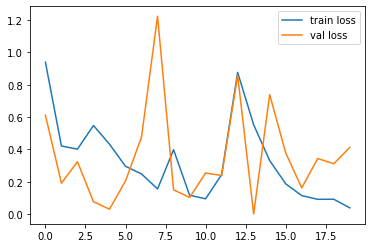

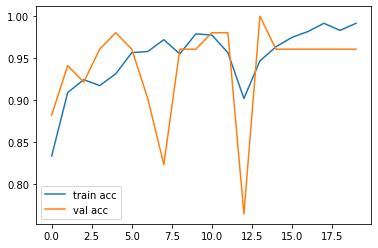

<Figure size 432x288 with 0 Axes>

In [18]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [19]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_cotton_disease_vgg16.h5')

In [20]:
# Part 4 - Making a single prediction from test data
# image taken from test deseased cotton leaf

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/datasets/Cotton Disease/test/diseased cotton leaf/dis_leaf (328)_iaip.jpg',
                            target_size = (224,224))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
result

array([[1.000000e+00, 6.480735e-18]], dtype=float32)

In [21]:
# image taken from validation set deseased cotton leaf

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/datasets/Cotton Disease/val/diseased cotton leaf/dis_leaf (242)_iaip.jpg',
                            target_size = (224,224))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
result

array([[9.9981910e-01, 1.8087798e-04]], dtype=float32)

In [22]:
y=np.argmax(model.predict(test_image), axis=1)
y

array([0])

In [23]:
if y==0:
  print("The image classified as deseased cotton leaf")
else:
  print("The image classified as fresh cotton leaf")

The image classified as deseased cotton leaf
